# <p style="text-align: center;">MIS 382N: Advanced Machine Learning</p>
# <p style="text-align: center;">Homework 3</p>
## <p style="text-align: center;">Total points: 85</p>
## <p style="text-align: center;">Due: Monday, **Oct 18th** submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. Please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting (%matplotlib inline). 

**Note: Notebooks MUST have the images embedded in them. There will be no regrades if attached images do not render in the notebook. Please re download from canvas after submission and make sure all attached images render without errors. (Hint: Image module from IPython.display)**

**This can be an individual assignment or group of 2. If you choose to do it as a group, please specify who you are working with (name and EID), then only one student should submit the homework. Put your name and eid here.**

Name: Emilio Cabrera

EID: EAC4622

Name: Shreya Bhootda

EID: XXXX

# Question 1: Stochastic gradient descent II (20 pts)

Write an SGD solution in Python to the non-linear model without using any other library except for those provided in the code template below. 

$$ y = w_0 + w_1x_1 + w_2x_1x_2 + w_3x_1^2x_2 + w_4x_1x_2^2 + w_5x_2^3$$ 

The solution class template is given. The `init()` function of the class takes as input the `learning_rate`, `regularization_constant` and `number_of_epochs`. The `fit()` method must take as input `X`, `y` and `update_rule` which can be `'sgd_momentum'` or `'RMSprop'`. The `predict()` method takes an `X` value (optionally, an array of values). 

Use your new gradient descent regression to train your model and predict the data given in 'SGD_samples.csv', for 30 epochs, using learning rates: `[0.0001, 0.001, 0.01, 0.05]` and regularization (ridge regression) constants: `[0, 0.01, 0.1]`. **(8 points)** 

Plot MSE and the $w$ parameters as a function of epoch (for 30 epochs) for the best 2 combinations of `learning_rate` and `regularization_constant` for SGD-Momentum, RMSprop, i.e., for each combination, you should have one plot for MSE vs Epoch and another for the parameters(weights) vs Epoch using respectively SGD-Momentum and RMSprop, hence in total 8 plots. Report the `learning_rate`, `regularization_constant` and MSE at the end of 30 epochs for the two best combinations for SGD-Momentum and RMSprop respectively. **($4\times 2 = 8$ pts)**

Observe the results, compare the performance of the two learning methods **(4 pts)**. 

Here is a blog which you can go through to know about RMSprop and Adam - [blog](http://ruder.io/optimizing-gradient-descent/).

Following codes are for your reference, please don't change the initialization values of the given parameters.


In [30]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

num_of_coefs = 6

class LinearRegression:
    
    def __init__(self, learning_rate, regularization, n_epoch):
        self.learning_rate = learning_rate
        self.n_epoch = n_epoch
        self.regularization = regularization
        self.eps = 10**-8
        self.coef = np.zeros(num_of_coefs) # coefficient vector
        self.cache = np.zeros(self.coef.shape) # used only for rmsprop
        self.gama = 0.9 # used only for rmsprop
        self.mu = 0.9 # used in momentum
        self.change = 0

    def rmsprop(self, gradient):
        self.cache = self.gama*self.cache + 0.1*(gradient**2)
        decay = self.learning_rate/(np.sqrt(self.cache + self.eps))
        self.coef = self.coef - np.multiply(decay*gradient)
    
    def sgd_momentum(self, gradient):
        change_new = self.learning_rate*gradient + self.mu*self.change
        self.coef = self.coef - change_new
        self.change = change_new
    
    def fit(self, X, y, update_rule='sgd_momentum', plot=False):
        '''
        Fit the model given X, y. It uses the specified update_rule
        and displays a plot of the coefficients vs epochs, and mse vs epochs if plot is set as True. 
        
        -> use get_features to get the features from X
        -> for epoch in epochs:
            iterate through all x, y.
                compute prediction using linearPredict.
                compute gradient.
                pass this gradient to the corresponding update function and update the coefficients
                keep track of mse and coefficients
        -> plot if required
        
        '''
        mse = []
        coefs = []
        
        X = self.get_features(X)
        for epoch in range(self.n_epoch):
            for i in range(X.shape[0]):
                grad = np.zeros(6)
                
                # Compute error
                error = self.linearPredict(X[i]) - y[i]
                
                # Compute gradients
                grad[0] = 2*error*X[i][0]
                grad[1] = 2*error*X[i][1] + self.regularization*self.coef[1]
                grad[2] = 2*error*X[i][2] + self.regularization*self.coef[2]
                grad[3] = 2*error*X[i][3] + self.regularization*self.coef[3]                
                grad[4] = 2*error*X[i][4] + self.regularization*self.coef[4]
                grad[5] = 2*error*X[i][5] + self.regularization*self.coef[5]
                
                
                # Update Weights
                if update_rule == 'sgd_momentum':
                    self.sgd_momentum(grad)
                else:
                    self.rmsprop(grad)
            
        
        
            coefs.append(self.coef.copy())
            residuals = y - self.linearPredict(X)         
            mse.append(np.mean(residuals**2))

        self.lowest_mse = mse[-1]
        if plot == True:
            plt.figure(figsize=(8,6))
            plt.plot(range(self.n_epoch),mse)
            plt.xlabel('epoch')
            plt.ylabel('MSE')
            plt.figure(figsize=(8,6))
            coefs = np.array(coefs)
            plt.plot(range(self.n_epoch),coefs[:,0],label='w0')
            plt.plot(range(self.n_epoch),coefs[:,1],label='w1')
            plt.plot(range(self.n_epoch),coefs[:,2],label='w2')
            plt.plot(range(self.n_epoch),coefs[:,3],label='w3')
            plt.plot(range(self.n_epoch),coefs[:,4],label='w4')
            plt.plot(range(self.n_epoch),coefs[:,5],label='w5')
            plt.legend()
            plt.xlabel('epoch')
            plt.ylabel('parameter value')

    def get_features(self, X):
       x = np.zeros((X.shape[0], num_of_coefs))
       x[:,0] = 1
       x[:,1] = X[:,0]
       x[:,2] = X[:,0]*X[:,1]
       x[:,3] = (X[:,0]**2)*X[:,1]
       x[:,4] = X[:,0] * (X[:,1]**2)
       x[:,5] = X[:,1]**3
       
       return x
        
    def linearPredict(self, X_features):
        return np.dot(X_features,self.coef)
       

In [31]:
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('SGD_samples.csv')
X = np.array([data['x1'].values, data['x2'].values]).T
y = data['y'].values
n_epochs = 30
learning_rate = [0.0001, 0.001, 0.01, 0.05]
regularization = [0, 0.01, 0.1]

<ipython-input-30-95e0f1404166>:77: RuntimeWarning: overflow encountered in square
  mse.append(np.mean(residuals**2))
<ipython-input-30-95e0f1404166>:64: RuntimeWarning: overflow encountered in double_scalars
  grad[5] = 2*error*X[i][5] + self.regularization*self.coef[5]
<ipython-input-30-95e0f1404166>:64: RuntimeWarning: invalid value encountered in double_scalars
  grad[5] = 2*error*X[i][5] + self.regularization*self.coef[5]
<ipython-input-30-95e0f1404166>:60: RuntimeWarning: invalid value encountered in double_scalars
  grad[1] = 2*error*X[i][1] + self.regularization*self.coef[1]
<ipython-input-30-95e0f1404166>:61: RuntimeWarning: invalid value encountered in double_scalars
  grad[2] = 2*error*X[i][2] + self.regularization*self.coef[2]
<ipython-input-30-95e0f1404166>:62: RuntimeWarning: invalid value encountered in double_scalars
  grad[3] = 2*error*X[i][3] + self.regularization*self.coef[3]
<ipython-input-30-95e0f1404166>:63: RuntimeWarning: invalid value encountered in double_sca

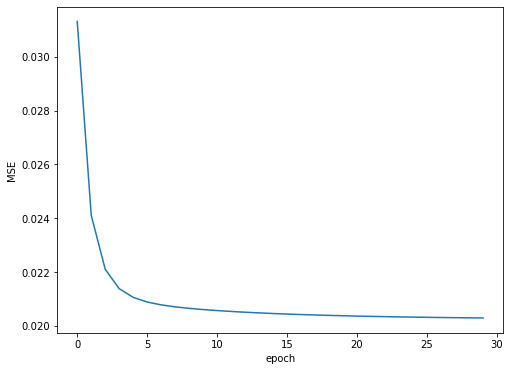

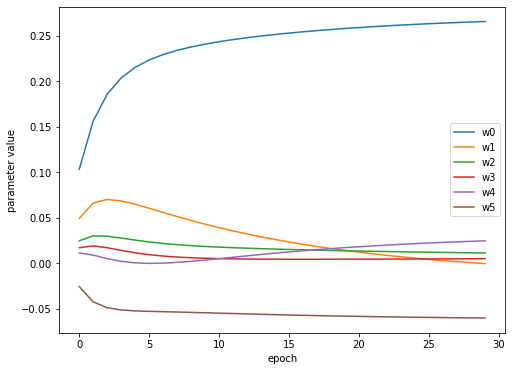

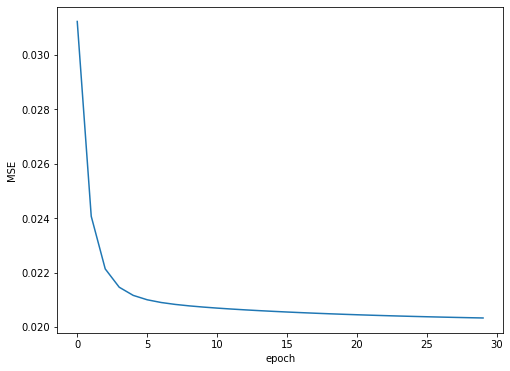

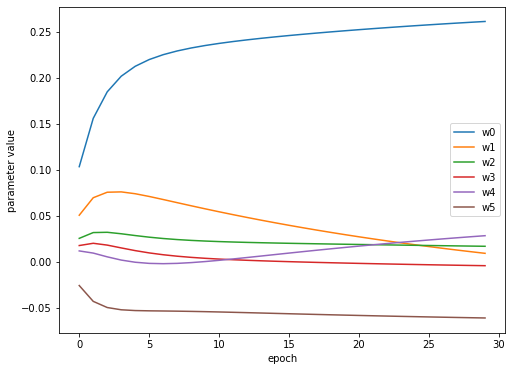

In [32]:
lowest = []
pairs = []

for l in learning_rate:
    for r in regularization:
        pairs.append([l,r])
        obj = LinearRegression(l,r,n_epochs)
        obj.fit(X,y,update_rule='sgd_momentum',plot=False)
        lowest.append(obj.lowest_mse)
        

best_combo = pairs[pd.Series(lowest).idxmin()]


sec_best_combo_ind = lowest.index(sorted(lowest)[1])
sec_best_combo = pairs[sec_best_combo_ind]

best = LinearRegression(best_combo[0], best_combo[1], n_epochs)
best.fit(X,y,update_rule='sgd_momentum',plot=True)

sec_best = LinearRegression(sec_best_combo[0], sec_best_combo[1], n_epochs)
sec_best.fit(X,y,update_rule='sgd_momentum',plot=True)

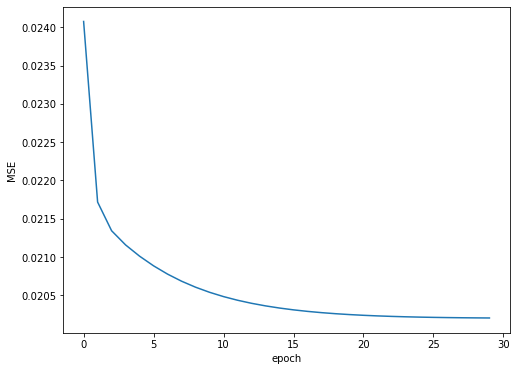

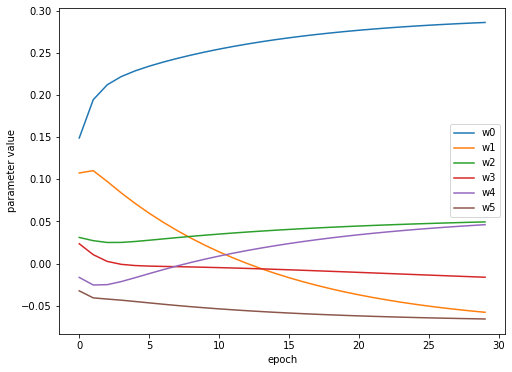

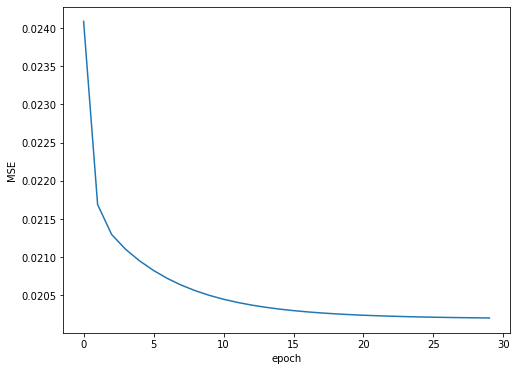

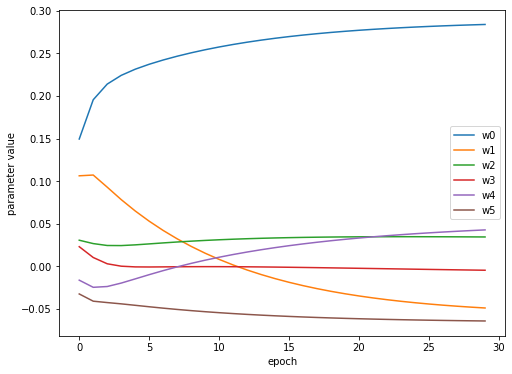

In [34]:
lowest = []
pairs = []

for l in learning_rate:
    for r in regularization:
        pairs.append([l,r])
        obj = LinearRegression(l,r,n_epochs)
        obj.fit(X,y,update_rule='rmsprop',plot=False)
        lowest.append(obj.lowest_mse)
        

best = pairs[pd.Series(lowest).idxmin()]


sec_best_ind = lowest.index(sorted(lowest)[1])
sec_best_combo = pairs[sec_best_ind]

best = LinearRegression(best[0], best[1], n_epochs)
best.fit(X,y,update_rule='rmsprop',plot=True)

sec_best = LinearRegression(sec_best_combo[0], sec_best_combo[1], n_epochs)
sec_best.fit(X,y,update_rule='rmsprop',plot=True)

We could observe from the above analysis that rmprop and momentum perform similarly on the given data set, with an RMSE value of 0.201 and 0.202 respectively and for the same hyperparameter value of 0.001 and regularization value of 0. Momentum changes the velocity with which the weights move towards the local/global minima, whereas rmsprop changes the learning rate. Both the algorithms with the right parameters can lead to the global minima.

# Answer:

# Question 2: Tensorflow Playground (15 pts)

In this question, you will be playing with [Tensorflow Playground](https://playground.tensorflow.org).

Select "**Classification**" as the **Problem Type**. Among the four datasets shown in DATA, please select the **top right** dataset. 

Use the following settings as the DEFAULT settings for all **subquestions**:
- Learning rate = 0.03
- Activation = Tanh
- Regularization = None
- Ratio of training to test data = 50%
- Noise = 0
- Batch Size = 30
- input as $X_1$ with $X_2$
- One hidden layer with two neurons

## Question 2A)

Use the DEFAULT setting and run two experiments - one using **Tanh** as the activation function and one using the **Linear** activation function. Report the train, test losses for both at the end of **1000 epochs**. What qualitative difference do you observe in the decision boundaries obtained? What do you think is the reason for this? 

## Answer

Utilizing **Tanh** as the activation function produced the following at the end of  **1000 epochs**:

- Test Loss: 0.194
- Training Loss: 0.220
- Decision Boundary: One will notice that there two decision boundaries which appear as two parallel lines split diagonally. Both the decision boundaries and loss values converge between 700 and 1000 epochs
- Reasoning: Given that the activation function is non-linear, it is universal approximator to better estimate the classification boundaries. The boundaries seem to be appropriate as given that the orange clusters fall within the orange classification boundaries. Visually the colors are darker/harder signifying that the weights are closer to |1|

Utilizing **Linear** as the activation function produced the following at the end of  **1000 epochs**:

- Test Loss: 0.504
- Training Loss: 0.497
- Decision Boundary: One will notice that the decision boundary is located on the diagonal of the chart. Both the decision boundary and loss values converge within 100 epochs
- Reasoning: Given that the activation function is linear, we do not have a universal approximator, and thus it is equivalent to using a standard linear regression model. Visually the colors are lighter/softer signifying that the weights are closer to 0
We will now study the effect of certain variations in the network structure or training process, keeping all other aspects the same as in the DEFAULT setting specified above, with **Tanh** as the activation.

## Question 2B)

Effect of number of hidden units: Keep other settings the same as in DEFAULT, report the training loss and test loss at the end of 1000 epochs **using 4 neurons and 8 neurons in the hidden layer**. What do you observe in terms of the decision boundary obtained as the number of neurons increases? What do you think is the reason for this? 

## Answer

Utilizing **4 neurons** in the hidden layer produced the following at the end of  **1000 epochs**:

- Test Loss: 0.017
- Training Loss: 0.017
- Decision Boundary: One will notice that there are four decision boundaries is which appear as four separate quadrants. Both the decision boundaries and loss values converge between 300 and 500 epochs
- Reasoning: As we increase the number of neurons, we increase the complexity of our model. By increasing the complexity, it appears the boundaries become more precise, identifying each cluster almost perfectly. Visually the colors are mild signifying that the weights are closer to |0.5|

Utilizing **8 neurons** in the hidden layer produced the following at the end of  **1000 epochs**:

- Test Loss: 0.009
- Training Loss: 0.006
- Decision Boundary: One will notice that there are four decision boundaries, but instead of quadrants, the boundaries are curved to fit each cluster almost perfectly. Both the decision boundaries and loss values converge between 300 and 500 epochs
- Reasoning: Again, by increasing the complexity to 8 neurons we risk overfitting. In this case we see that the training loss is lower than that of the test loss, but the test loss indicates that 8 neurons is still better option than 4 neurons in the hidden layer. Visually the colors are mild signifying that the weights are closer to |0.5|

## Question 2C)

Effect of Learning rate and number of epochs: Keep other settings the same as in DEFAULT, change the Activation to **ReLU** and use **4 neurons** in the hidden layer. For learning rate 10, 1, 0.1, 0.01 and 0.001, report the train, test losses at the end of **100 epochs**, **1000 epochs** respectively. What do you observe from the change of loss vs learning rate, and the change of loss vs epoch numbers? 

## Answer

Keeping the **number of epochs at 100** constant. 

Utilizing **learning rate of 10** produced the following:
- Test Loss: 0.552
- Training Loss: 0.456

Utilizing **learning rate of 1** produced the following:
- Test Loss: 0.001
- Training Loss: 0.00

Utilizing **learning rate of 0.1** produced the following:
- Test Loss: 0.017
- Training Loss: 0.009

Utilizing **learning rate of 0.01** produced the following:
- Test Loss: 0.089
- Training Loss: 0.102

Utilizing **learning rate of 0.001** produced the following:
- Test Loss: 0.113
- Training Loss: 0.095


Keeping the **number of epochs at 1000** constant. 

Utilizing **learning rate of 10** produced the following:
- Test Loss: 0.552
- Training Loss: 0.456

Utilizing **learning rate of 1** produced the following:
- Test Loss: 0.000
- Training Loss: 0.000

Utilizing **learning rate of 0.1** produced the following:
- Test Loss: 0.008
- Training Loss: 0.000

Utilizing **learning rate of 0.01** produced the following:
- Test Loss: 0.006
- Training Loss: 0.004

Utilizing **learning rate of 0.001** produced the following:
- Test Loss: 0.017
- Training Loss: 0.012

Conclusions: 

- Change of loss vs learning rate: The lower the learning rate, the slower the learner which has led to the lower loss for the training and testing sets
- Change of loss vs epoch number: The larger the epoch, the more samples, which has led to a lower loss for the training and testing sets
- Trade-off: When decreasing the learning rate at the epoch number of 1,000, the error rate actually saw a slight increase. The loss for both test and training falls within the first 100 epochs and then stabilizes/converges to a certain value after 100 epochs.

## Question 2D)

Use the DEFAULT setting. Play around with any hyperparameters, network architectures or input features (such as $\sin(X_1), X_1^2$ etc.), and report the best train and test loss you obtain (test loss should be no greater than 0.06). Attach the screenshot showing your full network, output, and the parameters. Briefly justify your results, and comment on what helps/what doesn't help with lowering the loss, etc. 

## Answer

Use the DEFAULT settings we adjusted the following parameters:
- Learning rate = 1
- Activation = Tanh
- Input feature as $X_1 * X_2$
- One hidden layer with two neurons

After adjusting for number of epochs and learning rates in the previous problems, we decided to keep a learning rate of one because it converged adequately fast. Similarly, the tanh activation function was an adequate universal approximator. We kept two neurons in the hidden layer but selected the input feature of $X_1 X_2$ which made our network accurately map to the decision boundaries. Additional features may help reduce the train loss; however we wanted to reduce the complexity and avoid overfitting. We were able to converge to a test loss of 0 between 40-70 epochs, which was the fastest of adjusted networks that we designed.

# Question 3: Outlier detection using PyOD (30 pts)

Oulier detection, or anomaly detection is usually an unsupervised learning task where the objective is to identify suspicious observations in data. It has been widely used in military surveillance for enemy activities to prevent attacks, intrusion detection in cyber security, fraud detection for credit cards, etc.

PyOD is a comprehensive and scalable Python library for detecting outlying objects in multivariate data. PyOD includes more than 30 detection algorithms and provides unified APIs which makes it quite handy to use. In this question, you will play with PyOD, explore three different outlier detection algorithms and compare their performances. First let's install PyOD.

```
# install pyod using pip first
!pip install pyod
```

You can load the data stored in 'Q3_train_dataset.csv' and 'Q3_test_dataset.csv' using the following codes.

```
import pandas as pd
# Load data code goes here
train_df = pd.read_csv('Q3_train_dataset.csv')
test_df = pd.read_csv('Q3_test_dataset.csv')

X_train = train_df[['X_train_0', 'X_train_1', 'X_train_2', 'X_train_3', 'X_train_4']].to_numpy()
y_train = train_df[['y_train']].to_numpy()
X_test = test_df[['X_test_0', 'X_test_1', 'X_test_2', 'X_test_3', 'X_test_4']].to_numpy()
y_test = test_df[['y_test']].to_numpy()
```

 `X_train` and `X_test` contain the features, with the dimension of 5. `y_train` and `y_test` store the outlier labels, 0 means normal data, 1 means outlier data. 
 
a) **(5 pts)** **Fit `X_train` to a linear outlier detection model Minimum Covariance Determinant (MCD) using PyOD**, this [page](https://pyod.readthedocs.io/en/latest/pyod.models.html#module-pyod.models.mcd) will provide some functions you may need. 

```
from pyod.models.mcd import MCD
clf = MCD() # initialize MCD class using the default parameters

# YOUR CODE SHOULD COME HERE, FIT THE MODEL USING X_TRAIN
```
**Use the fitted model to predict the outlier labels of `X_test`. Compute the raw outlier scores on `X_test` using `decision_function()`.**

**Run PyOD's `evaluate_print()` function using the test set ground truth outlier labels and the raw outlier scores predicted by the model, to compute the ROC and Precision@n results .** 

```
from pyod.utils.data import evaluate_print
```

b) **(5 pts)** `X_train` and `X_test` are 5-dimension features, which makes it impossible to visualize them in Euclidean plane. But we can use Principal Component Analysis (PCA) to reduce the dimensions of `X_train` and `X_test` to 2, and then plot them. You may want to use `fit_and_transform()` function.


```
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

# Fit pca to X_train and X_test and transform 
train_principalComponents = # IMPLEMENT
test_principalComponents = # IMPLEMENT
```

After reducing the dimension to 2, now you can visualize the outliers using PyOD's `visualize()` function. Please plot the visualization. You may find [this](https://pyod.readthedocs.io/en/latest/pyod.utils.html#module-pyod.utils.example) useful on how to use `visualize()` .

```
from pyod.utils.example import visualize
```

Now you should be able to observe the ground truth outliers and the outliers predicted by the model.


c) **(20 pts)** Apply the same process as in (a) and (b) to the following two models, and visualize the outlier results. Please compare the performance of the three models in terms of their ROC, Precision@n, and what you observe from the three visualizations.

*   [Proximity-Based model - Clustering Based Local Outlier Factor (CBLOF)](https://pyod.readthedocs.io/en/latest/pyod.models.html#module-pyod.models.cblof)
*   [Probabilistic model - Copula-based Outlier Detection (COPOD)](https://pyod.readthedocs.io/en/latest/pyod.models.html#module-pyod.models.copod)

```
from pyod.models.cblof import CBLOF
from pyod.models.copod import COPOD
```

# Answer:

In [22]:
import pandas as pd
# Load data code goes here
train_df = pd.read_csv('Q3_train_dataset.csv')
test_df = pd.read_csv('Q3_test_dataset.csv')

X_train = train_df[['X_train_0', 'X_train_1', 'X_train_2', 'X_train_3', 'X_train_4']].to_numpy()
y_train = train_df[['y_train']].to_numpy()
X_test = test_df[['X_test_0', 'X_test_1', 'X_test_2', 'X_test_3', 'X_test_4']].to_numpy()
y_test = test_df[['y_test']].to_numpy()

In [23]:
# (a)
from pyod.models.mcd import MCD
clf = MCD() # initialize MCD class using the default parameters
# fit the model using X_train
clf.fit(X_train)
y_train_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
y_train_scores = clf.decision_scores_  # raw outlier scores





In [24]:
from pyod.utils.data import evaluate_print
pred_y_test = clf.predict(X_test)
test_scores = clf.decision_function(X_test)
print("Performance on Test Data:")
evaluate_print('MCD',y_test, test_scores)


Performance on Test Data:
MCD ROC:0.8689, precision @ rank n:0.6


C:\Users\shrey\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\shrey\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


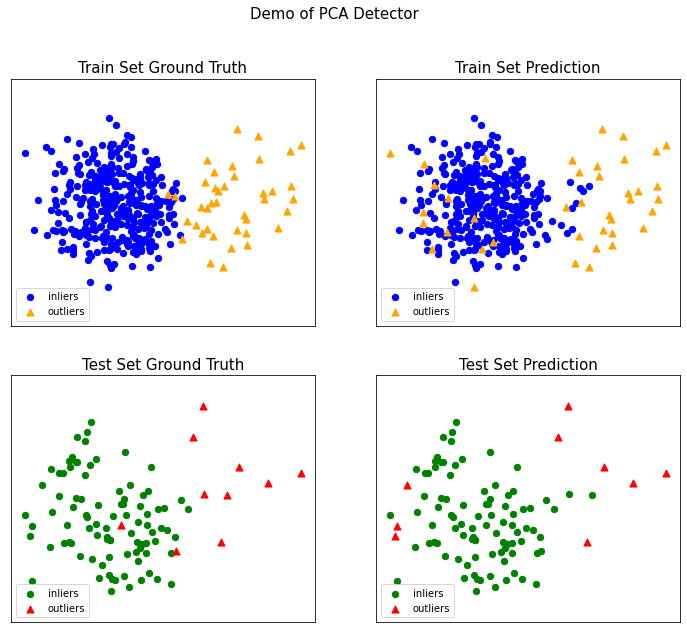

In [25]:
# (b)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

# Fit pca to X_train and X_test and transform 
train_principalComponents = pca.fit_transform(X_train)
test_principalComponents = pca.fit_transform(X_test)
#pca.predict()
from pyod.utils.example import visualize
# Visualize the ground truth outliers and predicted outliers using visualize()
visualize('PCA', train_principalComponents, y_train, test_principalComponents, y_test, clf.predict(X_train).reshape(-1,1),  pred_y_test,  show_figure=True, save_figure=False)

# YOUR CODE SHOULD COME HERE

Performance on Test Data:
CBLOF ROC:0.8689, precision @ rank n:0.6


C:\Users\shrey\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\shrey\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


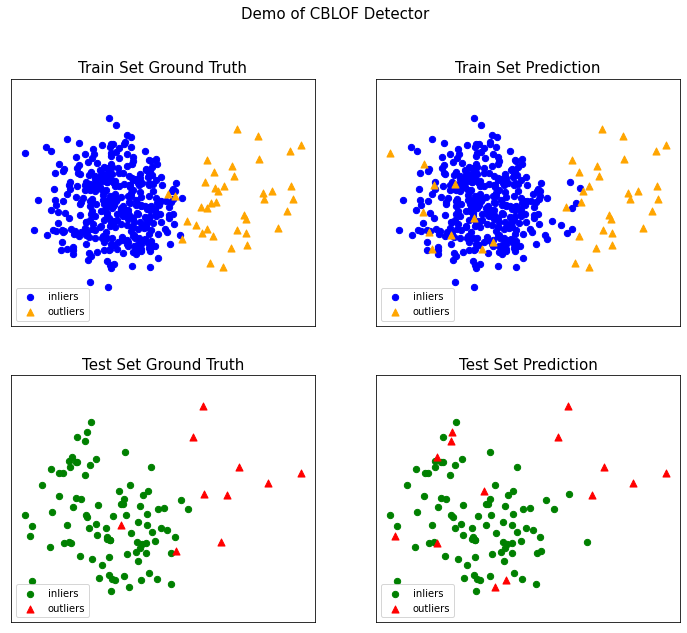

In [28]:
# (c)
from pyod.models.cblof import CBLOF
from pyod.models.copod import COPOD

cbl = CBLOF()
cbl.fit(X_train)
cbl_y_pred = cbl.predict(X_test)
test_scores = cbl.decision_function(X_test)
print("Performance on Test Data:")
evaluate_print('CBLOF',y_test, test_scores)

visualize('CBLOF', train_principalComponents, y_train, test_principalComponents, y_test, cbl.predict(X_train), cbl_y_pred,  show_figure=True, save_figure=False)


Performance on Test Data:
COPOD ROC:0.9556, precision @ rank n:0.8


C:\Users\shrey\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\shrey\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


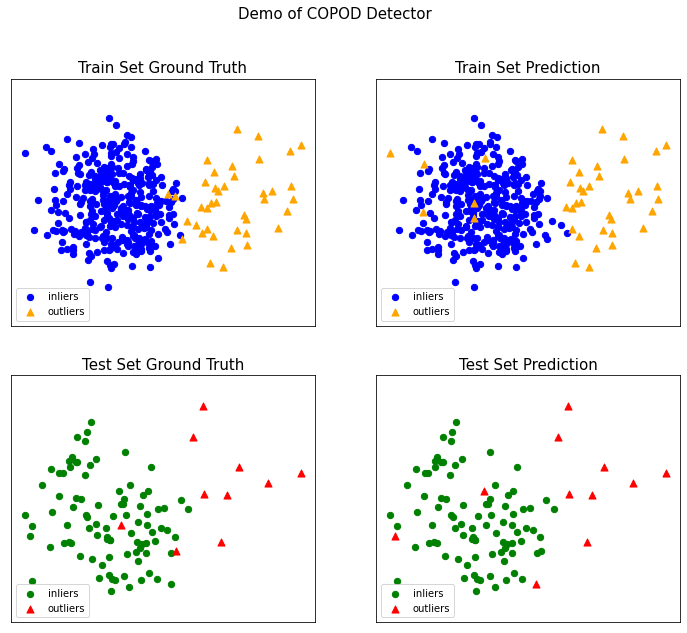

In [6]:
cpd = COPOD()
cpd.fit(X_train)
cpd_y_pred = cpd.predict(X_test)
test_scores = cpd.decision_function(X_test)
print("Performance on Test Data:")
evaluate_print('COPOD',y_test, test_scores)

visualize('COPOD', train_principalComponents, y_train, test_principalComponents, y_test, cpd.predict(X_train), cpd_y_pred,  show_figure=True, save_figure=False)
#visualize('CBLOF', train_principalComponents, y_train, test_principalComponents, y_test, cbl.predict(X_train).reshape(-1,1), cbl_y_pred,  show_figure=True, save_figure=False)

COPOD has the highest ROC value among the 3 models, therefore among the 3 models COPOD is doing the best job of classifying x into inliers and outliers. COPOD also has the highest precision for the given dataset, which means that COPOD is right 80% while detecting an outlier.
The train prediction plot shows us that COPOD detects fewer false positives and negatives than CBLOF and MCD. From teh test prediction plot we observe that false positives higher in CBLOF as compared to COPOD and MCD. Overall, we can deduce that COPOD is the best job of classifying x into outliers and inliers, this can be observed by both ROC and pricision measures as well as the test and train plots.

# Question 4: PCA Conceptual questions (5 pts)

Explain the principle of Principal Component Analysis algorithm, especially why we can select the best projection bases based on the covariance matrix of data from the perspective of optimization?

# Answer:

General Intuition of PCA:

The Principal Component Analysis (PCA) algorithm aims to address the curse of dimensionality. PCA is an unsupervised linear transformation technique primarily for feature extraction and dimensionality reduction. By reducing dimensionality (feature selection and feature extraction) one can reduce the complexity of a model and avoid overfitting. In feature selection, a subset of the original features is selected, whereas in feature extraction, information is derived from the feature set to construct a new feature subspace. The PCA algorithm (feature extraction) is used to compress a dataset onto a lower-dimensional feature subspace while also maintaining most of the relevant information.

Steps for PCA & Explanation of the Covariance Matrix: 
1) Standardize the D-dimensional dataset

2) Construct the covariance matrix

3) Decompose the covariance matrix into its eigenvectors & eigenvalues

4) Sort the eigenvalues in decreasing order and rank the corresponding eigenvectors

5) Select k-eigenvectors corresponding to the k-largest eigenvalues, where k is the dimensionality of the new feature subspace (k ≤ d)

6) Construct projection matrix W from the “top” k eigenvectors

7) Using the W matrix transform the d-dimensional input dataset X to obtain the new k-dimensional feature subspace

The goal of PCA is to reduce dimensionality by compressing onto a new feature subspace. Once we reach steps 3 & 4, we get a covariance matrix made up of eigenvectors. We can select the main eigenvectors (which are also considered as the principal components) that contain most of the information (variance explained). The covariance matrix assists in selecting a given number principal components for a specific amount of variance explained. Then we can utilize this given combination of vectors to transform the dimensionality of the original dataset.




# Question 5: Pre-processing and sampling (15 pts)

The following dataset contains House prices describing the sales of individual residential property in Ames, Iowa data with explanatory variables describing almost every aspect of residential homes and dependent variable being SalePrice. Here, some cells of most columns in the dataset contain NaN values.













In [7]:
import pandas as pd 
import numpy as np 
import scipy.stats as stats
import math
import matplotlib.pyplot as plt
np.random.seed(100)

data = pd.read_csv("sales_data.csv")
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SalePrice
0,60,RL,65.0,8450,NaN,7,5,2003,2003,196.0,...,0,0,0,NaN,NaN,NaN,0,2,2008,208500
1,20,RL,80.0,9600,NaN,6,8,1976,1976,0.0,...,0,0,0,NaN,NaN,NaN,0,5,2007,181500
2,60,RL,68.0,11250,NaN,7,5,2001,2002,162.0,...,0,0,0,NaN,NaN,NaN,0,9,2008,223500
3,70,RL,60.0,9550,NaN,7,5,1915,1970,0.0,...,0,0,0,NaN,NaN,NaN,0,2,2006,140000
4,60,RL,84.0,14260,NaN,8,5,2000,2000,350.0,...,0,0,0,NaN,NaN,NaN,0,12,2008,250000



a) **(2 pts)** Print the number of NaN values in each column.


In [9]:
data.isna().sum().sort_values(ascending=False)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
LotFrontage       259
GarageType         81
GarageYrBlt        81
MasVnrArea          8
Electrical          1
MSSubClass          0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
GarageCars          0
GarageArea          0
3SsnPorch           0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
KitchenAbvGr        0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
KitchenQual         0
HalfBath            0
BedroomAbvGr        0
MSZoning            0
LotArea             0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
ExterQual           0
BsmtFinSF1          0
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
HeatingQC           0
CentralAir          0
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

In [11]:
data.describe

<bound method NDFrame.describe of       MSSubClass MSZoning  LotFrontage  LotArea Alley  OverallQual  \
0             60       RL         65.0     8450   NaN            7   
1             20       RL         80.0     9600   NaN            6   
2             60       RL         68.0    11250   NaN            7   
3             70       RL         60.0     9550   NaN            7   
4             60       RL         84.0    14260   NaN            8   
...          ...      ...          ...      ...   ...          ...   
1455          60       RL         62.0     7917   NaN            6   
1456          20       RL         85.0    13175   NaN            6   
1457          70       RL         66.0     9042   NaN            7   
1458          20       RL         68.0     9717   NaN            5   
1459          20       RL         75.0     9937   NaN            5   

      OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  ... 3SsnPorch  \
0               5       2003          2003       196

b) **(3 pts)** Create a copy of `data`, and name it `data_dm`, then create a new column in `data_dm` named `binned_yr_built` and apply binning to the column `yr_built`. Use `pandas.cut()` and modify its paramter list as below:

```
bins=[1900, 1920, 1940, 1960, 1980, 2000, 2020]
labels=['1900-1920', '1920-1940', '1940-1960', '1960-1980', '1980-2000', '2000-2020']
include_lowest=True
```
Next, perform one-hot encoding on this new column.

In [12]:
data_dm = data.copy()
data_dm['binned_yr_built'] = pd.cut(x=data_dm['YearBuilt'], bins=[1900, 1920, 1940, 1960, 1980, 2000, 2020],
                   labels=['1900-1920', '1920-1940', '1940-1960', '1960-1980', '1980-2000', '2000-2020'], include_lowest=True)
data_dm.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SalePrice,binned_yr_built
0,60,RL,65.0,8450,NaN,7,5,2003,2003,196.0,...,0,0,NaN,NaN,NaN,0,2,2008,208500,2000-2020
1,20,RL,80.0,9600,NaN,6,8,1976,1976,0.0,...,0,0,NaN,NaN,NaN,0,5,2007,181500,1960-1980
2,60,RL,68.0,11250,NaN,7,5,2001,2002,162.0,...,0,0,NaN,NaN,NaN,0,9,2008,223500,2000-2020
3,70,RL,60.0,9550,NaN,7,5,1915,1970,0.0,...,0,0,NaN,NaN,NaN,0,2,2006,140000,1900-1920
4,60,RL,84.0,14260,NaN,8,5,2000,2000,350.0,...,0,0,NaN,NaN,NaN,0,12,2008,250000,1980-2000


In [13]:

binned_yr_dummy = pd.get_dummies(data_dm.binned_yr_built, prefix = 'yr_built')

data_dm = pd.merge(data_dm, binned_yr_dummy, left_index = True, right_index = True)

data_dm.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,MoSold,YrSold,SalePrice,binned_yr_built,yr_built_1900-1920,yr_built_1920-1940,yr_built_1940-1960,yr_built_1960-1980,yr_built_1980-2000,yr_built_2000-2020
0,60,RL,65.0,8450,NaN,7,5,2003,2003,196.0,...,2,2008,208500,2000-2020,0,0,0,0,0,1
1,20,RL,80.0,9600,NaN,6,8,1976,1976,0.0,...,5,2007,181500,1960-1980,0,0,0,1,0,0
2,60,RL,68.0,11250,NaN,7,5,2001,2002,162.0,...,9,2008,223500,2000-2020,0,0,0,0,0,1
3,70,RL,60.0,9550,NaN,7,5,1915,1970,0.0,...,2,2006,140000,1900-1920,1,0,0,0,0,0
4,60,RL,84.0,14260,NaN,8,5,2000,2000,350.0,...,12,2008,250000,1980-2000,0,0,0,0,1,0



c) **(2 pts)** Drop the columns which have more than 65 percentage of missing values.

In [14]:
percent = 65.0 # Like N %
min_count =  int(((100-percent)/100)*data_dm.shape[0] + 1)
data_dm = data_dm.dropna( axis=1, 
                thresh=min_count)
data_dm.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,...,MoSold,YrSold,SalePrice,binned_yr_built,yr_built_1900-1920,yr_built_1920-1940,yr_built_1940-1960,yr_built_1960-1980,yr_built_1980-2000,yr_built_2000-2020
0,60,RL,65.0,8450,7,5,2003,2003,196.0,Gd,...,2,2008,208500,2000-2020,0,0,0,0,0,1
1,20,RL,80.0,9600,6,8,1976,1976,0.0,TA,...,5,2007,181500,1960-1980,0,0,0,1,0,0
2,60,RL,68.0,11250,7,5,2001,2002,162.0,Gd,...,9,2008,223500,2000-2020,0,0,0,0,0,1
3,70,RL,60.0,9550,7,5,1915,1970,0.0,TA,...,2,2006,140000,1900-1920,1,0,0,0,0,0
4,60,RL,84.0,14260,8,5,2000,2000,350.0,Gd,...,12,2008,250000,1980-2000,0,0,0,0,1,0



d) **(3 pts)** Take a sample of 800 rows at random and compute its mean, compare this value with the population mean.
  

In [18]:
np.random.seed(6)
sample_ages = np.random.choice(a= data['SalePrice'], size=800)
#Sample mean
print('sample mean',np.mean(sample_ages))
#Population mean
print('population mean',np.mean(data['SalePrice']))

sample mean 178292.63125
population mean 180921.19589041095


e) **(2pts)** Calculate the 95% confidence intervals for SalePrice with a sample size of 100. 

**(3pts)** Calculate the 95% confidence intervals for 100 different trials with a sample size of 500. Plot the confidence intervals and interpret how it captures the population mean.

In [22]:
import scipy.stats
np.random.seed(10)
sample_size = 100
sample = np.random.choice(a= data_dm['SalePrice'],
                          size = sample_size)
sample_mean = sample.mean()

z_critical = scipy.stats.norm.ppf(1-.05/2)
#Get population standard deviation
pop_stdev = data['SalePrice'].std()

#margin of error
margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size)) 

#confidence interval
confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)  

#Print confidence interval and true mean value
print('Confidence Interval : ',confidence_interval)
print('True mean value:', data_dm['SalePrice'].mean())

Confidence Interval :  (166522.08555078227, 197662.97444921773)
True mean value: 180921.19589041095


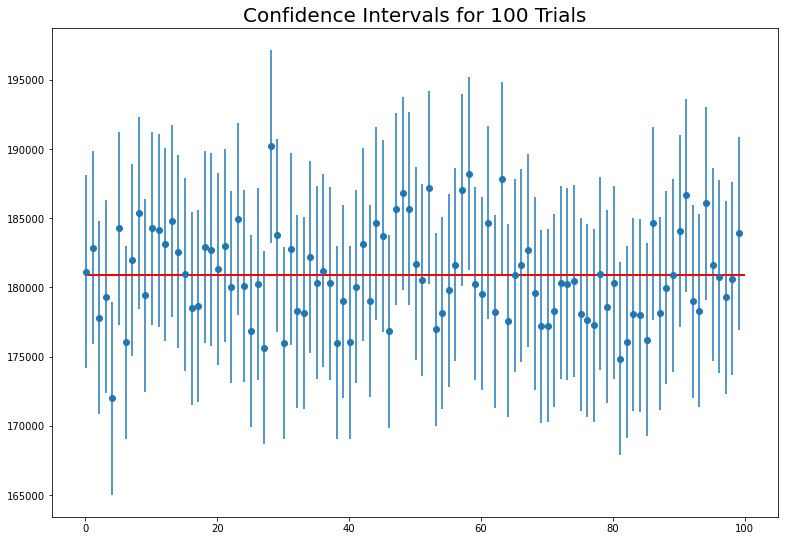

In [24]:
np.random.seed(12)

sample_size = 500

intervals = []
sample_means = []

for sample in range(100):
    sample = np.random.choice(a= data_dm['SalePrice'], size = sample_size)
    sample_mean = sample.mean()
    sample_means.append(sample_mean)
    # compute z critical value

    z_critical = scipy.stats.norm.ppf(1-.05/2)
    #Get population standard deviation
    pop_stdev = data['SalePrice'].std()     
  
    margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size))
    confidence_interval = (sample_mean - margin_of_error,
                           sample_mean + margin_of_error)  
    
    intervals.append(confidence_interval)
    
plt.figure(figsize=(13, 9))

plt.errorbar(x=np.arange(0.1, 100, 1), 
             y=sample_means, 
             yerr=[(top-bot)/2 for top,bot in intervals],
             fmt='o')

plt.hlines(xmin=0, xmax=100,
           y=data['SalePrice'].mean(), 
           linewidth=2.0,
           color="red")
plt.title('Confidence Intervals for 100 Trials', fontsize = 20)
plt.show()

At n=500...The 95% confidence interval for the sample mean Sales_Price is (166522, 197663) with a sample mean of 180921. 

Interpretation: Based on these intervals, we are 95% confident that a plausable and true mean for population's Sales_Price will in fact fall between the values of 166522 and 197663. When reducing the sample size to n=100 and plotting the confidence intervalas for each iteration, one can see that each Sales_Price does in fact fall between the values of 166522 and 197663 with only two exceptions. This further validates the above.